<a href="https://colab.research.google.com/github/pdh93621/Deep-learning/blob/main/TFIDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 파이썬 TF-IDF구현

In [ ]:
import pandas as pd
from math import log

In [ ]:
docs = [
        '먹고 싶은 사과',
        '먹고 싶은 바나나',
        '길고 노란 바나나 바나나',
        '저는 과일이 좋아요'
]

In [ ]:
# docs에 있는 각 문장을 띄어쓰기로 나누고, 중복 문자열 제거
vocab = list(set(w for doc in docs for w in doc.split()))

In [ ]:
print(vocab)

['과일이', '길고', '싶은', '저는', '사과', '좋아요', '노란', '먹고', '바나나']


In [ ]:
N = len(docs)

In [ ]:
N

4

In [ ]:
# 문장 d 에서 문자열 t의 갯수 구하기
def tf(t,d):
  return d.count(t)

# 문서(docs)내의 각 문장(doc)에서 문자열(t)가 나온 횟수들의 총합을 구하고 Inverse Docu Freq로 변환
def idf(t):
  df = 0
  for doc in docs:
    df += t in doc
  return log(N/(df+1))

In [ ]:
# TF-IDF
def tfidf(t,d):
  return tf(t,d) * idf(t)

In [ ]:
# 결과
result = []

for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns=vocab)

In [ ]:
tfidf_

,과일이,길고,싶은,저는,사과,좋아요,노란,먹고,바나나
0,0.000000,0.000000,0.287682,0.000000,0.693147,0.000000,0.000000,0.287682,0.000000
1,0.000000,0.000000,0.287682,0.000000,0.000000,0.000000,0.000000,0.287682,0.287682
2,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000,0.575364
3,0.693147,0.000000,0.000000,0.693147,0.000000,0.693147,0.000000,0.000000,0.000000


## sklearn을 이용한 TF-IDF실습

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
corpus = docs.copy()

In [ ]:
# 위의 과정을 패키지를 이용해 한줄로 끝내기
tfidfv = TfidfVectorizer().fit(corpus)

In [ ]:
print(tfidfv.transform(corpus).toarray())
print(tfidfv.vocabulary_)

[[0.         0.         0.         0.52640543 0.         0.66767854
  0.52640543 0.         0.        ]
 [0.         0.         0.         0.57735027 0.57735027 0.
  0.57735027 0.         0.        ]
 [0.         0.47212003 0.47212003 0.         0.7444497  0.
  0.         0.         0.        ]
 [0.57735027 0.         0.         0.         0.         0.
  0.         0.57735027 0.57735027]]
{'먹고': 3, '싶은': 6, '사과': 5, '바나나': 4, '길고': 1, '노란': 2, '저는': 7, '과일이': 0, '좋아요': 8}


In [ ]:
# 보기좋게 데이터 프레임화(수치보다는 수치의 분포가 중요하다) >>> 타이핑 잘못한듯 값이 다르다
pd.DataFrame(tfidfv.transform(corpus).toarray(), columns=tfidfv.vocabulary_)

,먹고,싶은,사과,바나나,길고,노란,저는,과일이,좋아요
0,0.00000,0.00000,0.00000,0.526405,0.00000,0.667679,0.526405,0.00000,0.00000
1,0.00000,0.00000,0.00000,0.577350,0.57735,0.000000,0.577350,0.00000,0.00000
2,0.00000,0.47212,0.47212,0.000000,0.74445,0.000000,0.000000,0.00000,0.00000
3,0.57735,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.57735,0.57735


## 로이터 데이터로 TF-ITF 학습하기

In [ ]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


In [ ]:
# 로우터 데이터 가져오기(빈번하게 사용되는 단어 num_words 만큼, 테스트 데이터는 20%)
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [ ]:
print(f'훈련 샘플의 수: {len(x_train)}')

훈련 샘플의 수: 8982


In [ ]:
print(f'테스트 샘플의 수: {len(x_test)}')

테스트 샘플의 수: 2246


In [ ]:
# 이미 인코딩 되어있다
print(x_train[0])
print(x_test[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192, 510, 17, 12]


In [ ]:
print(y_train)
print(y_test)

[ 3  4  3 ... 25  3 25]
[ 3 10  1 ...  3  3 24]


In [ ]:
num_classes = max(y_train) + 1
print(f'클래스의 수: {num_classes}')

클래스의 수: 46


In [ ]:
print(f'훈련용 뉴스의 최대 길이: {max(len(l) for l in x_train)}')
print(f'훈련용 뉴스의 평균 길이: {sum(map(len, x_train))/len(x_train)}')

훈련용 뉴스의 최대 길이: 2376
훈련용 뉴스의 평균 길이: 145.5398574927633


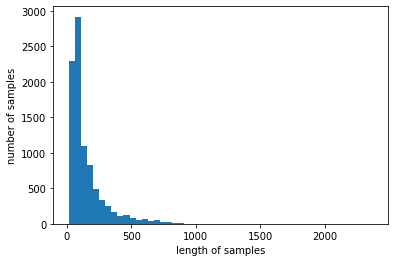

In [ ]:
plt.hist([len(s) for s in x_train], bins = 50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


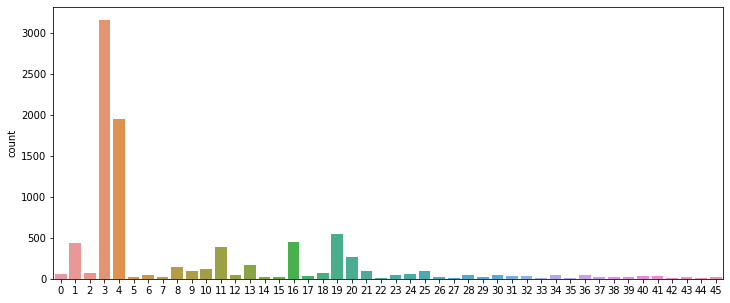

In [ ]:
# 샘플의 길이별 샘플의 수 그래프화
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(12,5)
sns.countplot(y_train)

In [ ]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print('각 클래스 빈도수: ')
print(np.asarray((unique_elements, counts_elements)))

각 클래스 빈도수: 
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


In [ ]:
word_index = reuters.get_word_index(path='reuters_word_index.jason')

557056/550378 [==============================] - 0s 0us/step


In [ ]:
word_index['the']

1

In [ ]:
word_index['it']

13

In [ ]:
index_to_word = {index + 3: word for word, index in word_index.items()}

In [ ]:
# 사실은 3개씩 밀려있다
print(index_to_word[4])
print(index_to_word[16])

the
it


In [ ]:
for index, token in enumerate(('<pad>','<sos>', '<unk>')):
  index_to_word[index] = token

In [ ]:
# 디코딩
print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [ ]:
# train, test 디코딩 
train_data = []
test_data = []

for x in x_train:
  train_data.append(' '.join([index_to_word[index] for index in x]))
for y in x_test:
  test_data.append(' '.join([index_to_word[index] for index in y]))

In [ ]:
tfidfv_train = TfidfVectorizer().fit(train_data)
tfidfv_test = TfidfVectorizer().fit(test_data)

In [ ]:
# 주말에 해봐야지
import sklearn.metrics import classification_report
print(classification_report)